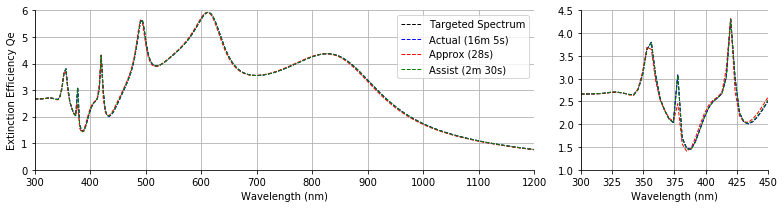

In [10]:
#check answer quality
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import snlay as snlay
#from jupyterthemes import jtplot
#currently installed theme will be used to
#set plot style if no arguments provided
#jtplot.style()
mats = np.array([3, 4, 3, 4, 3, 4, 3, 4])
lams = np.linspace(300, 1200, 256)

# actual target
size_t = np.array([30., 64., 52., 36., 36., 64., 35., 62.])
targ_spec = snlay.calc_spectrum(size_t, mats, lams)

# actual target
size_sn = np.array([30., 64., 52., 36., 36., 64., 35., 62.])
targ_sn = snlay.calc_spectrum(size_sn, mats, lams)

# actual target
size_mod_p = np.array([40., 58., 51., 34., 35., 64., 35., 62.])
targ_mod_p = snlay.calc_spectrum(size_mod_p, mats, lams)

size_mod = np.array([37., 61., 48., 35., 38., 64., 34., 61.])
targ_mod = snlay.calc_spectrum(size_mod, mats, lams)


fig1 = plt.figure(figsize=(11,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[8, 3]) 

ax = plt.subplot(gs[0])
#ax = fig1.add_subplot(1,2,1)
#ax.set_title('silica coated gold')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Extinction Efficiency Qe')
ax.set_ylim((0, 6))
ax.set_xlim((300, 1200))
plt.plot(lams, targ_spec,'k--', linewidth=1, label='Targeted Spectrum')
plt.plot(lams, targ_sn,'b--', linewidth=1, label='Actual (16m 5s)')
plt.plot(lams, targ_mod,'r--', linewidth=1, label='Approx (28s)')
plt.plot(lams, targ_mod_p,'g--', linewidth=1, label='Assist (2m 30s)')
#plt.plot(lams, 10*np.abs(spec_ac - spec)/spec_ac,'k', linewidth=1, label='10x Relative error')
ax.legend(loc='best')
plt.grid(True)
ax2 = plt.subplot(gs[1])
#fig2 = plt.figure(figsize=(3,3))
#ax2 = fig1.add_subplot(1,2,2)
#ax.set_title('silica coated gold')
ax2.set_xlabel('Wavelength (nm)')
#ax.set_ylabel('Extinction Efficiency Qe')
ax2.set_ylim((1, 4.5))
ax2.set_xlim((300, 450))
plt.plot(lams, targ_spec,'k--', linewidth=1, label='Targeted Spectrum')
plt.plot(lams, targ_sn,'b--', linewidth=1, label='Actual (16m 5s)')
plt.plot(lams, targ_mod,'r--', linewidth=1, label='Approx (28s)')
plt.plot(lams, targ_mod_p,'g--', linewidth=1, label='Assist (2m 30s)')
#plt.plot(lams, spec, 'r--', linewidth=2, label='predicted')
#plt.plot(lams, 10*np.abs(spec_ac - spec)/spec_ac,'b', linewidth=1, label='10x Relative error')
#ax.legend(loc='best')
plt.grid(True)
plt.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

#plt.savefig('optimizers.png')





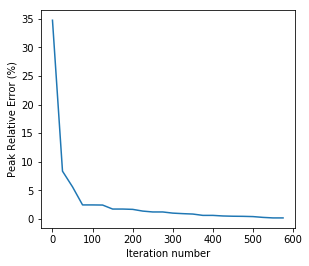

In [5]:
approx_mre = np.array([[0.0, 1.7444054],
[50.0, 0.75968117],
[100.0, 0.71295995],
[150.0, 0.6474583],
[200.0, 0.645691],
[250.0, 0.6181751],
[300.0, 0.61033905],
[350.0, 0.60982],
[400.0, 0.6055719],
[450.0, 0.6024746]])


assist_pre = np.array([[0.0,  1.1158075896087172],
   [0.0, 1.1158075896087172],
   [40.0, 0.8150859613864927],
   [60.0, 0.8150859613864927],
   [80.0, 0.8150859613864927],
   [100.0,  0.7252854930644419],
   [120.0,    0.5596733128944251],
   [140.0,   0.49493466218342536],
   [160.0,    0.49493466218342536],
   [180.0,    0.44012459407140986],
   [200.0,    0.44012459407140986],
   [220.0,    0.41603703170757483],
   [240.0,    0.36669514306882695],
   [260.0,    0.3204032876378119],
   [280.0,    0.3204032876378119]])


act_pre= np.array([[  0.0, 34.764084177464106],
 [ 25.0, 8.340754312117314],
  [ 50.0, 5.596934152569711],
  [ 75.0, 2.4355046393850808],
  [100.0, 2.4355046393850808],
  [125.0, 2.4134250007110736],
  [150.0, 1.7133162654256295],
  [175.0, 1.7133162654256295],
  [200.0, 1.657703207258774],
  [225.0, 1.357276014324554],
  [250.0, 1.2038289909480697],
  [275.0, 1.2038289909480697],
  [300.0, 1.0010963661625447],
  [325.0, 0.9091072669949225],
  [350.0, 0.8380571414952189],
  [375.0, 0.6046218491740213],
  [400.0, 0.6046218491740213],
  [425.0, 0.5006209308298584],
  [450.0, 0.45559701169843764],
  [475.0, 0.4376195672622949],
  [500.0, 0.3938599657695569],
  [525.0, 0.25238263922875026],
  [550.0, 0.16105660067589186],
  [575.0, 0.16105660067589186]])



fig1 = plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 5]) 
ax = plt.subplot(gs[0])
#ax = fig1.add_subplot(1,2,1)
#ax.set_title('silica coated gold')
ax.set_xlabel('Iteration number')
ax.set_ylabel('Peak Relative Error (%)')
##ax.set_ylim((0, 6))
#ax.set_xlim((300, 1200))

ax.plot(act_pre[:,0], act_pre[:,1])











